# Create Synthetic Image Data - Image Composition
_Viraf Patrawala (May, 2020)_

## STEP 1: Install and Import Required Libraries

Have a look at the import statements below. Install any module you might not already have.

In [1]:
import os
import numpy as np
import skimage.io as io
import skimage.transform as transform
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib inline

## Get the Foreground Image

This is an image of the object class for which you want to generate a synthetic dataset.

#### 1) Create your own foreground image
Download an image from the internet, and cut out the object from it using any tools (for example, Photoshop, GIMP)

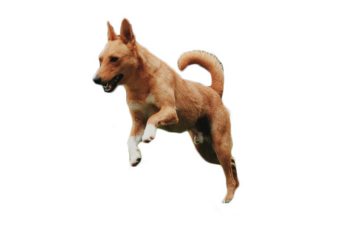

In [2]:
# Read the image
I = io.imread('./dogSeg.jpg')/255.0

plt.axis('off')
plt.imshow(I)
plt.show()

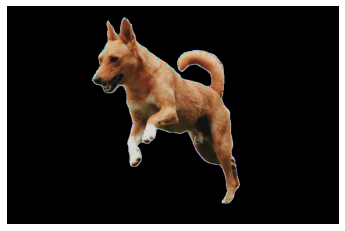

In [3]:
# Get only the foreground
foreground = I.copy()
foreground[foreground>=0.9]=0
plt.axis('off')
plt.imshow(foreground)
plt.show()

## Compose the object with a random background

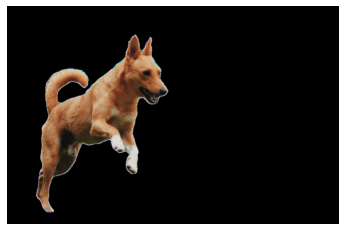

In [7]:
### Apply augmentations on the foreground.

def foregroundAug(foreground):
    # Random rotation, zoom, translation
    angle = np.random.randint(-10,10)*(np.pi/180.0) # Convert to radians
    zoom = np.random.random()*0.4 + 0.8 # Zoom in range [0.8,1.2)
    t_x = np.random.randint(0, int(foreground.shape[1]/3))
    t_y = np.random.randint(0, int(foreground.shape[0]/3))

    tform = transform.AffineTransform(scale=(zoom,zoom),
                                rotation=angle,
                                translation=(t_x, t_y))
    foreground = transform.warp(foreground, tform.inverse)

    # Random horizontal flip with 0.5 probability
    if(np.random.randint(0,100)>=50):
        foreground = foreground[:, ::-1]
        
    return foreground

foreground_new = foregroundAug(foreground)
# Visualize the foreground
plt.imshow(foreground_new)
plt.axis('off')
plt.show()

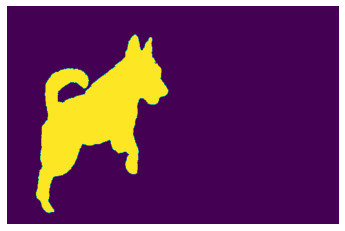

In [8]:
# Create a mask for this new foreground object
def getForegroundMask(foreground):
    mask_new = foreground.copy()[:,:,0]
    mask_new[mask_new>0] = 1
    return mask_new

mask_new = getForegroundMask(foreground_new)
plt.imshow(mask_new)
plt.axis('off')
plt.show()

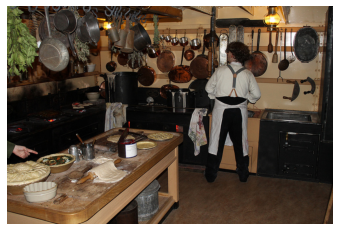

In [9]:
# Random selection of background from the folder
background_fileName = np.random.choice(os.listdir("./backgrounds/"))
background = io.imread('./backgrounds/'+background_fileName)/255.0

# Visualize the background
plt.imshow(background)
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


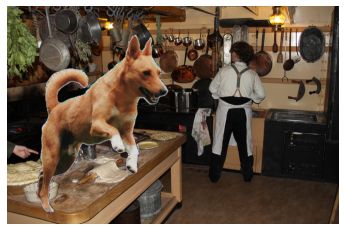

In [11]:
def compose(foreground, mask, background):
    # resize background
    background = transform.resize(background, foreground.shape[:2])

    # Subtract the foreground area from the background
    background = background*(1 - mask.reshape(foreground.shape[0], foreground.shape[1], 1))

    # Finally, add the foreground
    composed_image = background + foreground
    
    return composed_image

composed_image = compose(foreground_new, mask_new, background)
plt.imshow(composed_image)
plt.axis('off')
plt.show()

#### To calculate the bounding box for Object Detection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


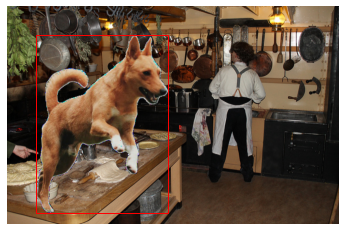

In [12]:
# Get the smallest & largest non-zero values in each dimension and calculate the bounding box
nz = np.nonzero(mask_new)
bbox = [np.min(nz[0]), np.min(nz[1]), np.max(nz[0]), np.max(nz[1])]

x = bbox[1]
y = bbox[0]
width = bbox[3] - bbox[1]
height = bbox[2] - bbox[0]


# Display the image
plt.imshow(composed_image)

#draw bbox on the image
plt.gca().add_patch(Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none'))
plt.axis('off')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


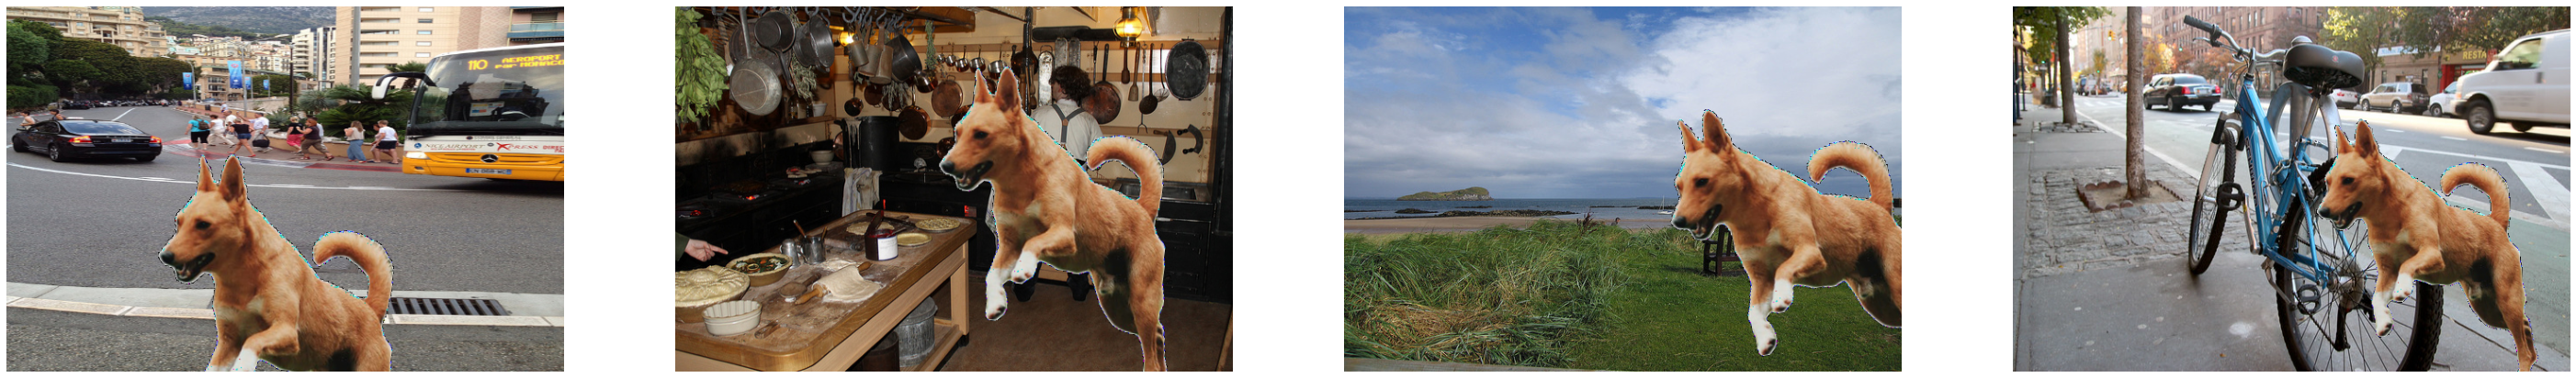

In [15]:
# For visualization
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(50, 30))
for i in range(4):
    foreground_new = foregroundAug(foreground)
    mask_new = getForegroundMask(foreground_new)
    background = io.imread('./backgrounds/' + os.listdir("./backgrounds/")[i])/255.0
    composed_image = compose(foreground_new, mask_new, background)
    axes[i].imshow(composed_image)
    axes[i].set_axis_off()
plt.show()